In [24]:
import sys
import os
import glob
import random
import copy
from IPython.display import display, Markdown
sys.path.append('../..')

from model import processing
from matplotlib import pyplot as plt

from model import run
from model import plot_utils as pu
from model.amm.omnipool_amm import OmnipoolState, cash_out_omnipool, value_assets, usd_price, lrna_price
from model.amm.stableswap_amm import StableSwapPoolState, stableswap_slip_fee
from model.amm.agents import Agent
from model.amm.trade_strategies import stableswap_arbitrage, invest_all, random_swaps
from model.amm.global_state import GlobalState, fluctuate_prices, historical_prices

# same seed, same parameters = same simulation result
random.seed(42)
# price_list = processing.import_binance_prices(['BTC', 'ETH', 'DOT'], start_date='Jan 1 2023', days = 120)

assets = {
    'USDA': {'usd price': 1, 'weight': 0.25},
    'USDB': {'usd price': 1, 'weight': 0.25},
    'USDC': {'usd price': 1, 'weight': 0.25},
    'USDD': {'usd price': 1, 'weight': 0.25},
}

assert sum([t['weight'] for t in assets.values()]) == 1

initial_tvl = 1000000

initial_pool = StableSwapPoolState(
    tokens={
        tkn: initial_tvl * assets[tkn]['weight'] for tkn in assets
    },
    unique_id='stableswap',
    amplification=100,
    trade_fee=stableswap_slip_fee(
        base_percentage=0.002,
        slip_percentage=0
    )
)

initial_agent = Agent(
    holdings={tkn: 1000000 for tkn in assets},
    trade_strategy=random_swaps(
        pool_id='stableswap',
        amount={tkn: 20000 for tkn in assets}
    )
)

arbitrageur = Agent(
    holdings={tkn: 1000000 for tkn in assets},
    trade_strategy=stableswap_arbitrage(
        pool_id='stableswap',
        minimum_profit=1,
        precision=0.0001
    )
)

initial_state = GlobalState(
    pools={'stableswap': initial_pool},
    agents={
        'trader': initial_agent,
        'arbitrageur': arbitrageur
    },
    external_market={tkn: 1 for tkn in assets}
)

events=run.run(initial_state, 1000)

Starting simulation...
Execution time: 0.519 seconds.


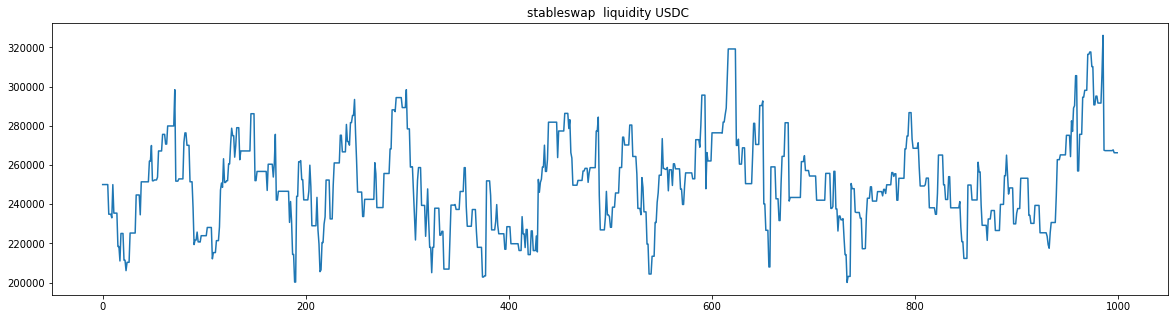

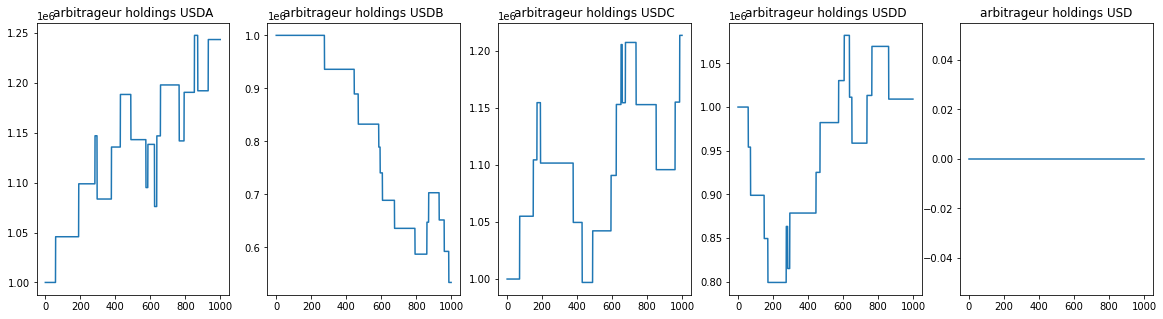

In [25]:
pu.plot(events, pool='stableswap', prop='liquidity', key='USDC')
pu.plot(events, agent='arbitrageur', prop='holdings')

In [26]:
print(sum(events[-1].agents['arbitrageur'].holdings.values()))

4000410.6745675923


In [3]:
print(no_fee_agent)

Agent: agent
********************************
trade strategy: None
holdings: (

    *USDA*: 0

    *stableswap*: 4999.6329526952
)



In [4]:
print (no_fee_agent.holdings['stableswap'])

4999.632952695247


In [5]:
initial_state.ann


400

In [6]:
no_fee_state.shares

1004999.6329526952

In [7]:
no_fee_agent

Agent: agent
********************************
trade strategy: None
holdings: (

    *USDA*: 0

    *stableswap*: 4999.6329526952
)

In [8]:
test_agent

Agent: agent
********************************
trade strategy: None
holdings: (

    *USDA*: 0

    *stableswap*: 4992.1334993161
)

In [9]:
test_pool.d

1004999.6329526952

In [10]:
test_pool.liquidity

{'USDA': 255000.0, 'USDB': 250000.0, 'USDC': 250000.0, 'USDD': 250000.0}

In [11]:
test_pool = StableSwapPoolState(
    tokens={'USDA': 25500, 'USDB': 25000, 'USDC': 25000, 'USDD': 25000},
    amplification=100
)
print(test_pool.d)

100499.96329526954
